In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [75]:
linestyles = {'passive': 'k-', 
              'p-1': 'g.-',
              'p-2': 'b.-',
              'p-3': 'r.-',
              'p-5': 'r.-',
              'greedy': 'c-p',
              'greedyla': 'y-o',
              'p-2_p-2': 'b-*',
              'p-2_greedyla' : 'b-x',
              'greedyla_greedyla': 'y-x',
              'greedy_greedy': 'c-s'}

method_names = {'passive': 'passive', 
                'p-2' : r'adap. samp., $p=2$',
                'p-1' : r'adap. samp., $p=1$',
                'p-5' : r'adap. samp., $p=5$',
                'greedy' : r'adap. sel.',
                'greedyla' : 'adap. search'}

## Previous Plots


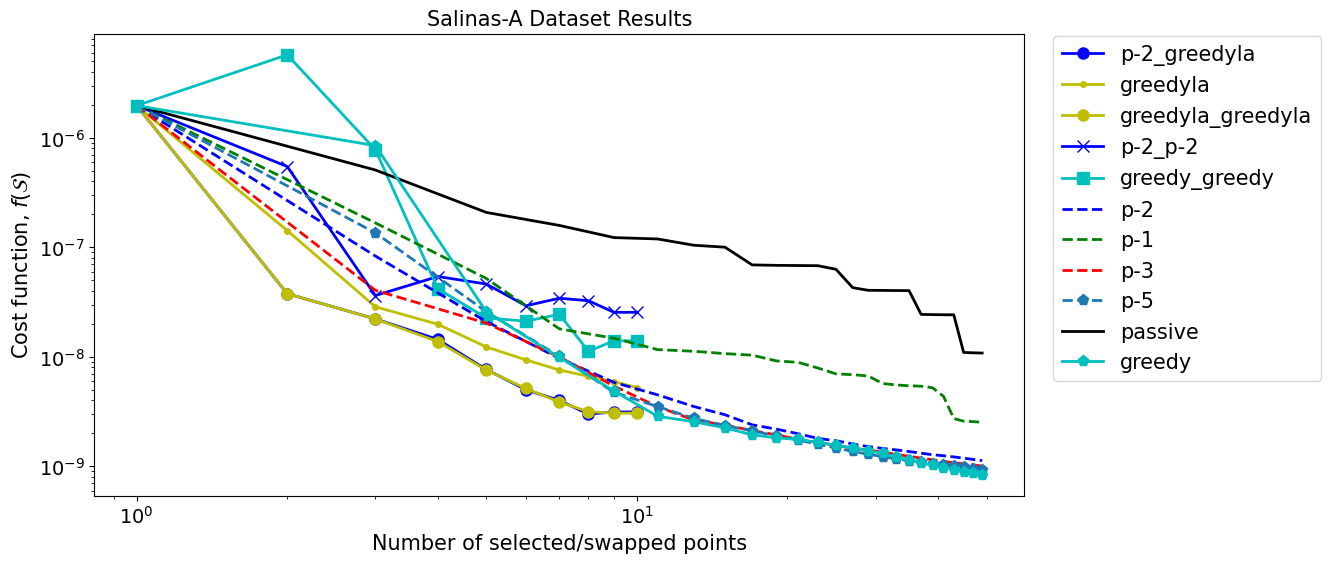

In [6]:
orig_to_plot = ['p-2_greedyla', 'greedyla', 'greedyla_greedyla', 'p-2_p-2', 'greedy_greedy']
os_to_plot = ['p-2', 'p-1', 'p-3', 'p-5', 'passive', 'greedy']
save = False
skip = 2
datasetname = "Salinas-A"
dataset_lower = 'salinas'

with open(f"results/{dataset_lower}_cvx_k10_ns10_nla-1.pkl", "rb") as f:
    data_orig = pickle.load(f)
with open(f"results/{dataset_lower}_cvx_k50_ns10_nla-1_useprev.pkl", "rb") as f:
    data_os = pickle.load(f)

fig, ax = plt.subplots(figsize=(12,6))
for method in orig_to_plot:
    try:
        dict = data_orig[method]
    except:
        print(f"Something wrong with {method}...")
        continue 
    evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
    if len(method.split("_")) > 1:
        # if swap move method, overwrite the negative entries with the base adaptive sampling method results
        neg_mask = evals < 0.0
        base_evals = np.array([x for x in data_orig[method.split('_')[0]]['energy_values']]).mean(axis=0)
        evals[neg_mask] = base_evals[neg_mask]
        evals[1:-1] = evals[2:]

    plot = ax.semilogy(np.arange(1, evals.size+1), evals, linestyles[method], label=method, linewidth=2.0, markersize=8)

for method in os_to_plot:
    try:
        dict = data_os[method]
    except:
        print(f"Something wrong with {method}...")
        continue 
    evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
    if len(method.split("_")) > 1:
        # if swap move method, overwrite the negative entries with the base adaptive sampling method results
        neg_mask = evals < 0.0
        base_evals = np.array([x for x in data_os[method.split('_')[0]]['energy_values']]).mean(axis=0)
        evals[neg_mask] = base_evals[neg_mask]
        evals[1:-1] = evals[2:]

    plot = ax.semilogy(np.arange(1, evals.size+1)[::skip], evals[::skip], linestyles[method], label=method, linewidth=2.0, markersize=8)
    

ax.legend(bbox_to_anchor=(1.02, 1.018), fontsize=15, )
ax.set_xscale('log')
ax.set_xlabel(r"Number of selected/swapped points", fontsize=15)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r"Cost function, $f(\mathcal{S})$", fontsize=15)
if not save:
    ax.set_title(f"{datasetname} Dataset Results", fontsize=15)
else:
    plt.savefig(f"./figures/{datasetname.lower()}_k10_ns10_all_os50.png", format="png", dpi=500, bbox_inches='tight')
plt.show()




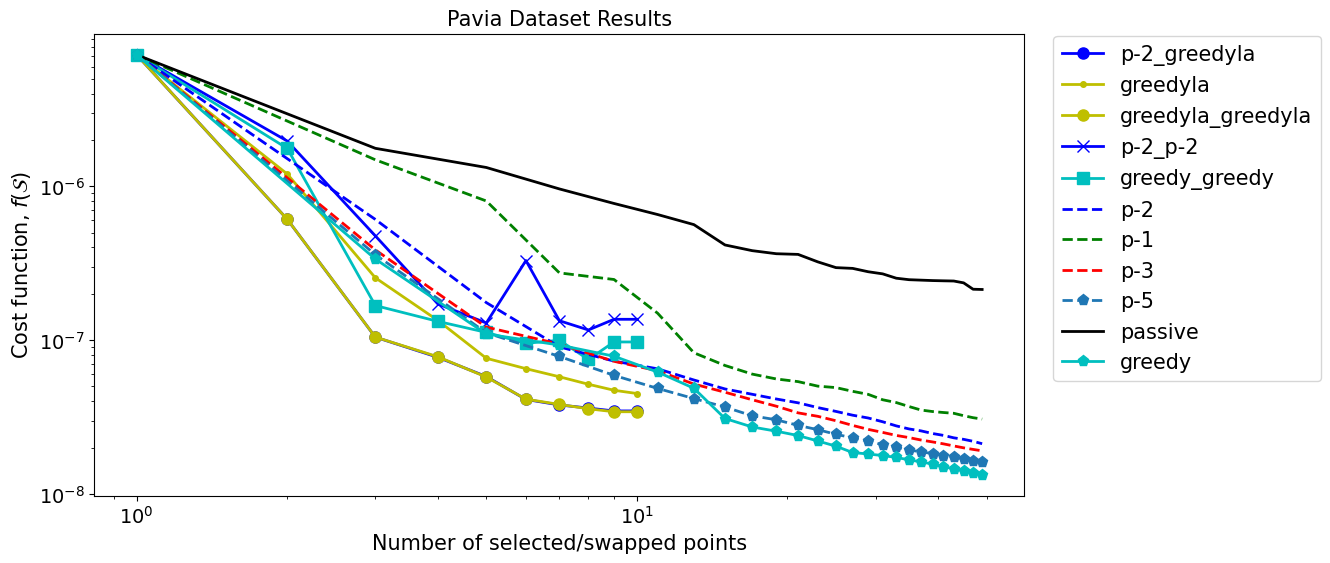

In [7]:
orig_to_plot = ['p-2_greedyla', 'greedyla', 'greedyla_greedyla', 'p-2_p-2', 'greedy_greedy']
os_to_plot = ['p-2', 'p-1', 'p-3', 'p-5', 'passive', 'greedy']
save = False
skip = 2
datasetname = "Pavia"
dataset_lower = 'paviasub'

with open(f"results/{dataset_lower}_cvx_k10_ns10_nla-1.pkl", "rb") as f:
    data_orig = pickle.load(f)
with open(f"results/{dataset_lower}_cvx_k50_ns10_nla-1_useprev.pkl", "rb") as f:
    data_os = pickle.load(f)

fig, ax = plt.subplots(figsize=(12,6))
for method in orig_to_plot:
    try:
        dict = data_orig[method]
    except:
        print(f"Something wrong with {method}...")
        continue 
    evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
    if len(method.split("_")) > 1:
        # if swap move method, overwrite the negative entries with the base adaptive sampling method results
        neg_mask = evals < 0.0
        base_evals = np.array([x for x in data_orig[method.split('_')[0]]['energy_values']]).mean(axis=0)
        evals[neg_mask] = base_evals[neg_mask]
        evals[1:-1] = evals[2:]

    plot = ax.semilogy(np.arange(1, evals.size+1), evals, linestyles[method], label=method, linewidth=2.0, markersize=8)

for method in os_to_plot:
    try:
        dict = data_os[method]
    except:
        print(f"Something wrong with {method}...")
        continue 
    evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
    if len(method.split("_")) > 1:
        # if swap move method, overwrite the negative entries with the base adaptive sampling method results
        neg_mask = evals < 0.0
        base_evals = np.array([x for x in data_os[method.split('_')[0]]['energy_values']]).mean(axis=0)
        evals[neg_mask] = base_evals[neg_mask]
        evals[1:-1] = evals[2:]

    plot = ax.semilogy(np.arange(1, evals.size+1)[::skip], evals[::skip], linestyles[method], label=method, linewidth=2.0, markersize=8)
    

ax.legend(bbox_to_anchor=(1.02, 1.018), fontsize=15, )
ax.set_xscale('log')
ax.set_xlabel(r"Number of selected/swapped points", fontsize=15)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r"Cost function, $f(\mathcal{S})$", fontsize=15)
if not save:
    ax.set_title(f"{datasetname} Dataset Results", fontsize=15)
else:
    plt.savefig(f"./figures/{datasetname.lower()}_k10_ns10_all_os50.png", format="png", dpi=500, bbox_inches='tight')
plt.show()




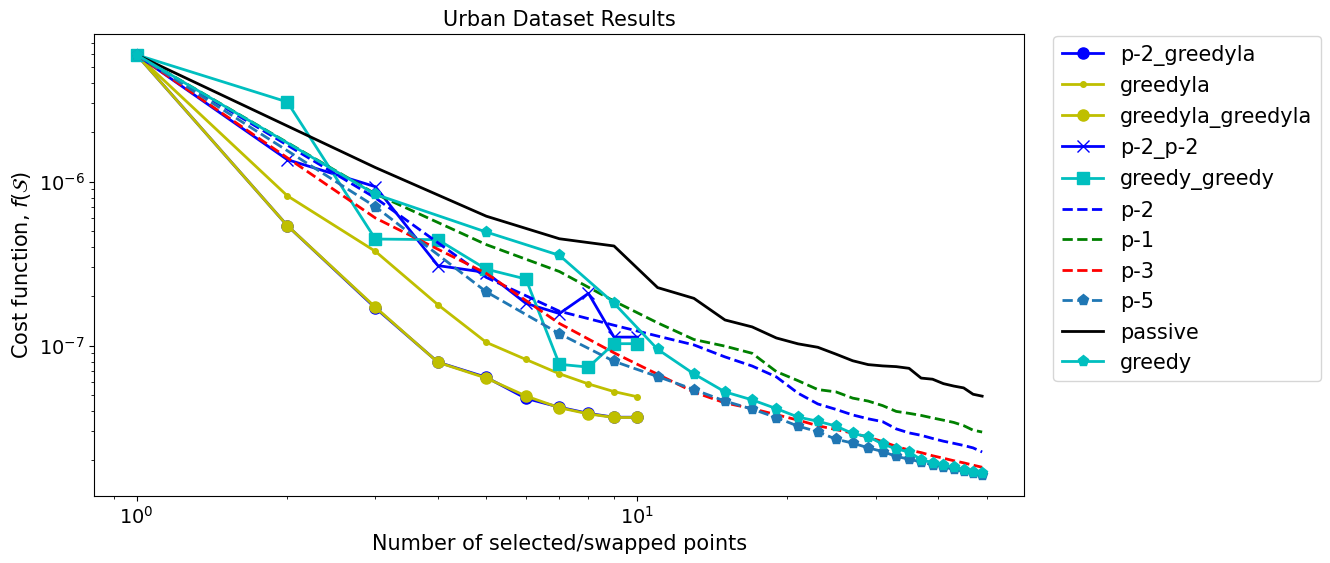

In [8]:
orig_to_plot = ['p-2_greedyla', 'greedyla', 'greedyla_greedyla', 'p-2_p-2', 'greedy_greedy']
os_to_plot = ['p-2', 'p-1', 'p-3', 'p-5', 'passive', 'greedy']
save = False
skip = 2
datasetname = "Urban"
dataset_lower = 'urbansub'

with open(f"results/{dataset_lower}_cvx_k10_ns10_nla-1.pkl", "rb") as f:
    data_orig = pickle.load(f)
with open(f"results/{dataset_lower}_cvx_k50_ns10_nla-1_useprev.pkl", "rb") as f:
    data_os = pickle.load(f)

fig, ax = plt.subplots(figsize=(12,6))
for method in orig_to_plot:
    try:
        dict = data_orig[method]
    except:
        print(f"Something wrong with {method}...")
        continue 
    evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
    if len(method.split("_")) > 1:
        # if swap move method, overwrite the negative entries with the base adaptive sampling method results
        neg_mask = evals < 0.0
        base_evals = np.array([x for x in data_orig[method.split('_')[0]]['energy_values']]).mean(axis=0)
        evals[neg_mask] = base_evals[neg_mask]
        evals[1:-1] = evals[2:]

    plot = ax.semilogy(np.arange(1, evals.size+1), evals, linestyles[method], label=method, linewidth=2.0, markersize=8)

for method in os_to_plot:
    try:
        dict = data_os[method]
    except:
        print(f"Something wrong with {method}...")
        continue 
    evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
    if len(method.split("_")) > 1:
        # if swap move method, overwrNoneite the negative entries with the base adaptive sampling method results
        neg_mask = evals < 0.0
        base_evals = np.array([x for x in data_os[method.split('_')[0]]['energy_values']]).mean(axis=0)
        evals[neg_mask] = base_evals[neg_mask]
        evals[1:-1] = evals[2:]

    plot = ax.semilogy(np.arange(1, evals.size+1)[::skip], evals[::skip], linestyles[method], label=method, linewidth=2.0, markersize=8)
    

ax.legend(bbox_to_anchor=(1.02, 1.018), fontsize=15, )
ax.set_xscale('log')
ax.set_xlabel(r"Number of selected/swapped points", fontsize=15)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r"Cost function, $f(\mathcal{S})$", fontsize=15)
if not save:
    ax.set_title(f"{datasetname} Dataset Results", fontsize=15)
else:
    plt.savefig(f"./figures/{datasetname.lower()}_k10_ns10_all_os50.png", format="png", dpi=500, bbox_inches='tight')
plt.show()




In [2]:
import pickle 
import matplotlib.pyplot as plt 
import numpy as np

In [105]:
def plot_energies(filename, to_plot, datasetname, save=False, skip=2):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    fig, ax = plt.subplots(figsize=(12,6))
    for method in to_plot:
        try:
            dict = data[method]
        except:
            print(f"Something wrong with {method}...")
            continue 
        evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
        print(method, evals.size)
        if len(method.split("_")) > 1:
            print("swap")
            # if swap move method, overwrite the negative entries with the base adaptive sampling method results
            neg_mask = evals < 0.0
            base_evals = np.array([x for x in data[method.split('_')[0]]['energy_values']]).mean(axis=0)
            evals[neg_mask] = base_evals[neg_mask]
            evals[1:-1] = evals[2:]
        plot = ax.semilogy(np.arange(1, evals.size+1), evals, linestyles[method], linewidth=2.0,label=method_names[method], markersize=8)
        '''
        if linestyles[method][-1] == '-':
            plot = ax.semilogy(np.arange(1, evals.size+1), evals, linestyles[method], linewidth=2.0,label=method_names[method], markersize=8)
        else:
            plot = ax.semilogy(np.arange(1, evals.size+1), evals, linewidth=2.0, c=linestyles[method][0])
            ax.scatter(np.arange(1, evals.size+1)[::skip], evals[::skip], marker=linestyles[method][-1], label=method_names[method], s=60, color=plot[0].get_color())
        '''
    ax.legend(bbox_to_anchor=(1.0, 1.01), fontsize=15, )
    ax.set_xscale('log')
    ax.set_xlabel(r"Number of selected/swapped points", fontsize=15)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    ax.set_ylabel(r"Cost function, $f(\mathcal{Y})$", fontsize=15)
    if not save:
        ax.set_title(f"{datasetname} Dataset Results", fontsize=15)
    else:
        plt.savefig(f"./figures/{filename.split(".")[0].split("/")[-1]}_results.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()

def plot_times(filename, to_plot, datasetname, save=False, k_show=None, skip=2):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    fig, ax = plt.subplots(figsize=(12,6))
    for method in to_plot:
        try:
            dict = data[method]
        except:
            print(f"Something wrong with {method}...")
            continue 
        times = np.array([x for x in dict['times']])
        times_mean = times.mean(axis=0)
        if k_show is None:
            k = times_mean.size
        else:
            k = k_show
        plot = ax.semilogy(np.arange(1, k+1), times_mean[:k], linestyles[method], label=method_names[method], linewidth=2.0, markersize=8)
    if k_show is None:
        ax.set_xscale('log')
    ax.legend(bbox_to_anchor=(1.02, 1.018), fontsize=15, )
    ax.set_xlabel(r"Number of selected/swapped points", fontsize=15)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    ax.set_ylabel(r"Time (s)", fontsize=15)
    if not save:
        ax.set_title(f"{datasetname} Dataset Timing Results", fontsize=15)
    else:
        plt.savefig(f"./figures/{filename.split(".")[0].split("/")[-1]}_times.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()

greedy 50
greedyla 10
p-1 50
p-2 50
p-5 50
passive 50


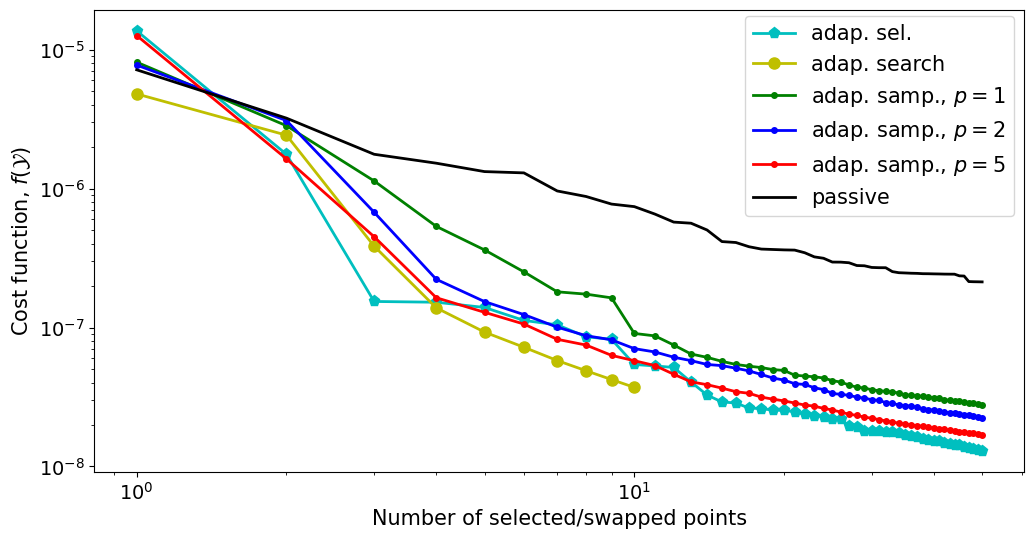

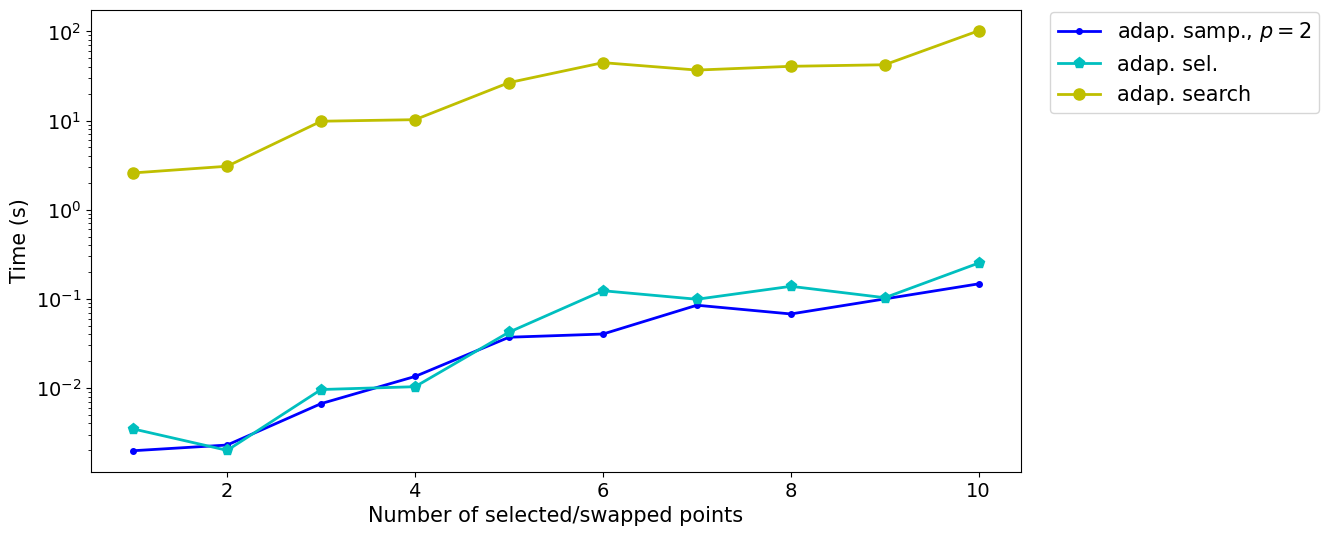

In [106]:
save = True
datasetname = "Pavia"
dataset_lower = 'paviasub'
filename = f"results/{dataset_lower}_cvx_k10_ns10_nla-1.pkl"
with open(filename, "rb") as f:
    data = pickle.load(f)

to_plot = list(data.keys())
time_to_plot = ['p-2', 'greedy', 'greedyla']

plot_energies(filename, to_plot, datasetname, save=save)
plot_times(filename, time_to_plot, datasetname, save=save, k_show=10)




greedy 50
greedyla 10
p-1 50
p-2 50
p-5 50
passive 50


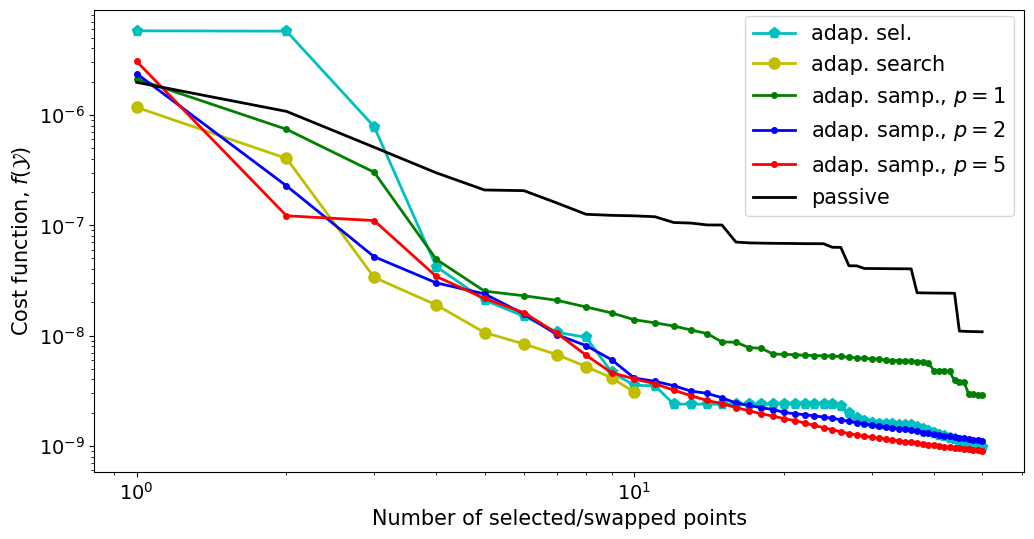

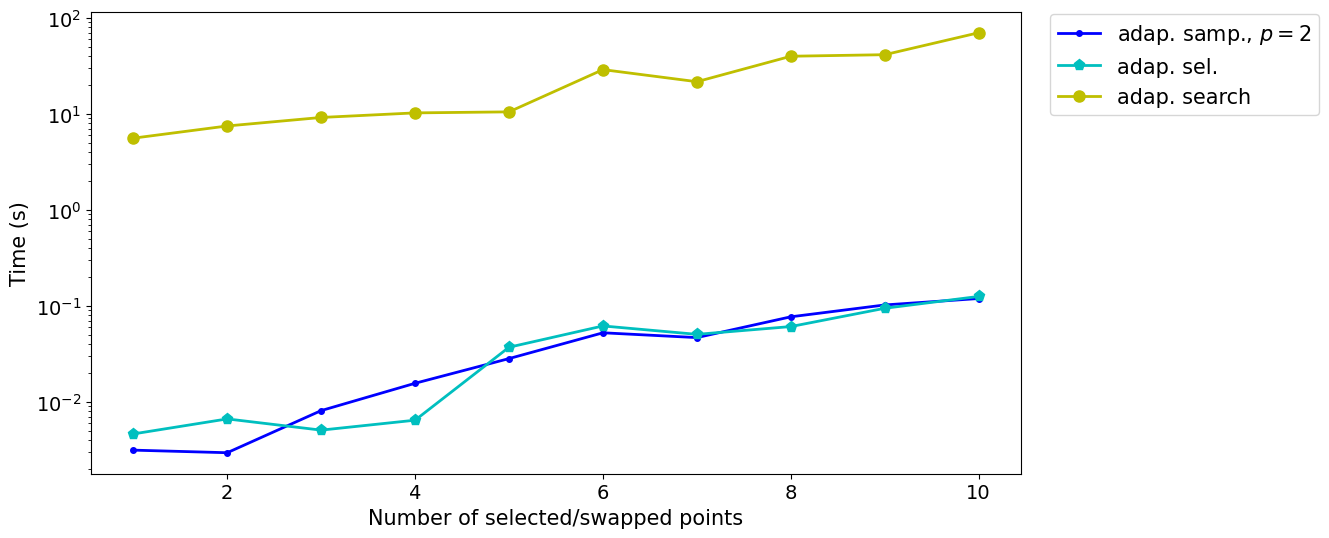

In [107]:

save = True
datasetname = "Salinas"
dataset_lower = 'salinas'
filename = f"results/{dataset_lower}_cvx_k10_ns10_nla-1.pkl"
with open(filename, "rb") as f:
    data = pickle.load(f)

to_plot = list(data.keys())
time_to_plot = ['p-2', 'greedy', 'greedyla']

plot_energies(filename, to_plot, datasetname, save=save)
plot_times(filename, time_to_plot, datasetname, save=save, k_show=10)




greedy 50
greedyla 10
p-1 50
p-2 50
p-5 50
passive 50


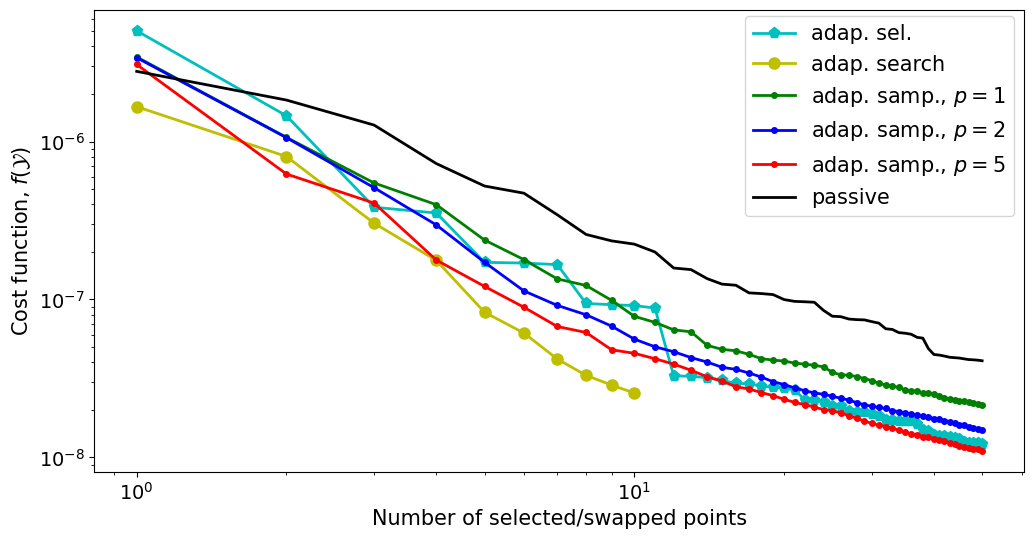

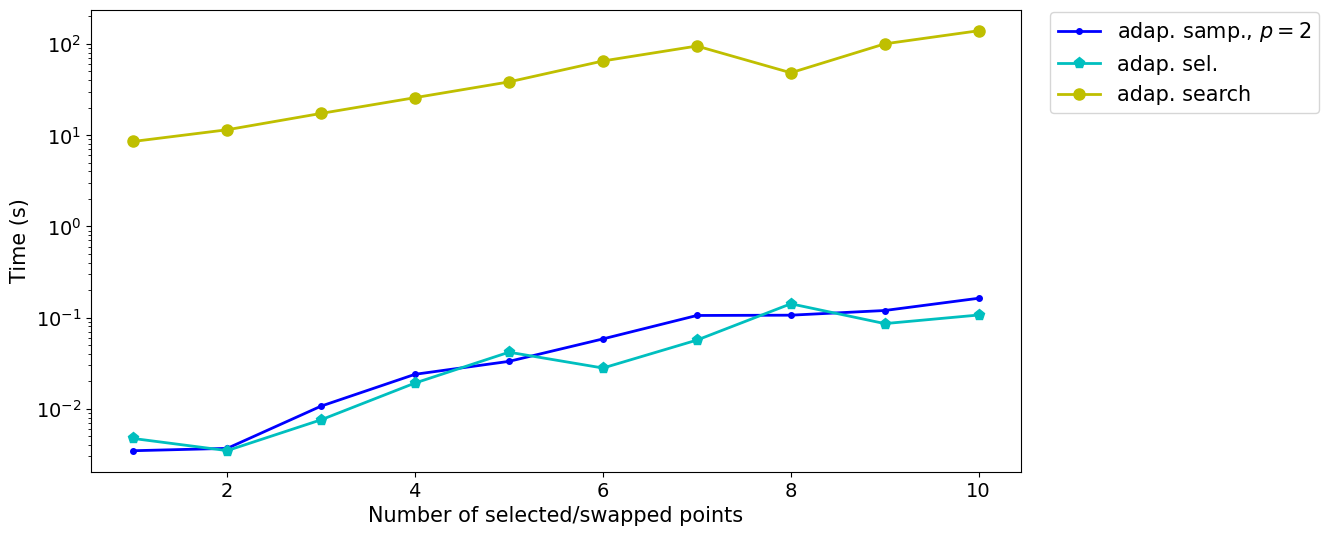

In [108]:
save = True
datasetname = "Urban"
dataset_lower = 'urbansub'
filename = f"results/{dataset_lower}_cvx_k10_ns10_nla-1.pkl"
with open(filename, "rb") as f:
    data = pickle.load(f)

to_plot = list(data.keys())
time_to_plot = ['p-2', 'greedy', 'greedyla']

plot_energies(filename, to_plot, datasetname, save=save)
plot_times(filename, time_to_plot, datasetname, save=save, k_show=10)



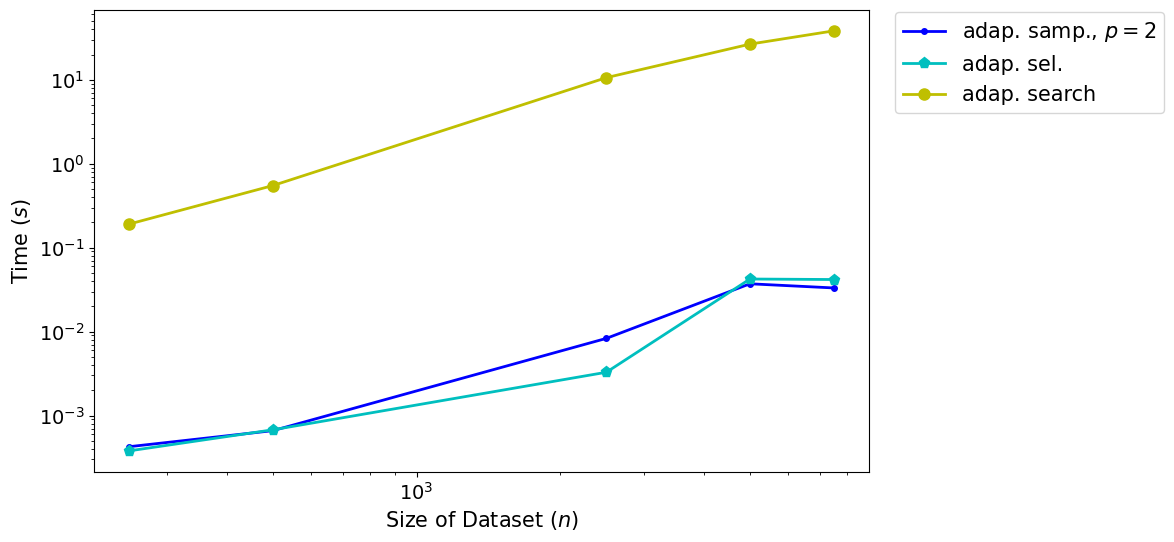

In [116]:
dataset_names = ['blobssmallest', 'blobssmall', 'blobs', 'paviasub', 'urbansub']
sizes = [250, 500, 2500, 5000, 7500]

time_to_plot = ['p-2', 'greedy', 'greedyla']
times_all = np.zeros((len(sizes), len(time_to_plot), 5))

for i, name in enumerate(dataset_names):
    try:
        with open(f"results/{name}_cvx_k10_ns10_nla-1.pkl", "rb") as f:
            data = pickle.load(f)
    except:
        with open(f"results/{name}_cvx_k5_ns10_nla-1.pkl", "rb") as f:
            data = pickle.load(f)
    for j, method in enumerate(time_to_plot):
        times = np.array([x for x in data[method]['times']])
        times_all[i,j,:] = times.mean(axis=0)[:5]

fig, ax = plt.subplots(figsize=(10,6))
idx = 4
for j, method in enumerate(time_to_plot):
    ax.loglog(sizes, times_all[:,j,idx], linestyles[method], label=method_names[method], linewidth=2.0, markersize=8)

ax.legend(bbox_to_anchor=(1.02, 1.018), fontsize=15, )
ax.set_xlabel(r"Size of Dataset $(n)$", fontsize=15)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r"Time $(s)$", fontsize=15)
if not save:
    ax.set_title(f"Timing Results", fontsize=15)
else:
    plt.savefig(f"./figures/nmf_times_all.png", format="png", dpi=500, bbox_inches='tight')
plt.show()

## Cleaned up plots


In [ ]:
orig_to_plot = ['p-2_greedyla', 'greedyla', 'greedyla_greedyla', 'p-2_p-2', 'greedy_greedy']
os_to_plot = ['p-2', 'p-1', 'p-3', 'p-5', 'passive', 'greedy']
save = True
skip = 2
datasetname = "Urban"
dataset_lower = 'urbansub'

with open(f"results/{dataset_lower}_cvx_k10_ns10_nla-1.pkl", "rb") as f:
    data_orig = pickle.load(f)
with open(f"results/{dataset_lower}_cvx_k50_ns10_nla-1_useprev.pkl", "rb") as f:
    data_os = pickle.load(f)

fig, ax = plt.subplots(figsize=(12,6))
for method in orig_to_plot:
    try:
        dict = data_orig[method]
    except:
        print(f"Something wrong with {method}...")
        continue 
    evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
    if len(method.split("_")) > 1:
        # if swap move method, overwrite the negative entries with the base adaptive sampling method results
        neg_mask = evals < 0.0
        base_evals = np.array([x for x in data_orig[method.split('_')[0]]['energy_values']]).mean(axis=0)
        evals[neg_mask] = base_evals[neg_mask]
        evals[1:-1] = evals[2:]

    plot = ax.semilogy(np.arange(1, evals.size+1), evals, linestyles[method], label=method, linewidth=2.0, markersize=8)

for method in os_to_plot:
    try:
        dict = data_os[method]
    except:
        print(f"Something wrong with {method}...")
        continue 
    evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
    if len(method.split("_")) > 1:
        # if swap move method, overwrite the negative entries with the base adaptive sampling method results
        neg_mask = evals < 0.0
        base_evals = np.array([x for x in data_os[method.split('_')[0]]['energy_values']]).mean(axis=0)
        evals[neg_mask] = base_evals[neg_mask]
        evals[1:-1] = evals[2:]

    plot = ax.semilogy(np.arange(1, evals.size+1)[::skip], evals[::skip], linestyles[method], label=method, linewidth=2.0, markersize=8)
    

ax.legend(bbox_to_anchor=(1.02, 1.018), fontsize=15, )
ax.set_xscale('log')
ax.set_xlabel(r"Number of selected/swapped points", fontsize=15)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r"Cost function, $f(\mathcal{S})$", fontsize=15)
if not save:
    ax.set_title(f"{datasetname} Dataset Results", fontsize=15)
else:
    plt.savefig(f"./figures/{datasetname.lower()}_k10_ns10_all_os50.png", format="png", dpi=500, bbox_inches='tight')
plt.show()




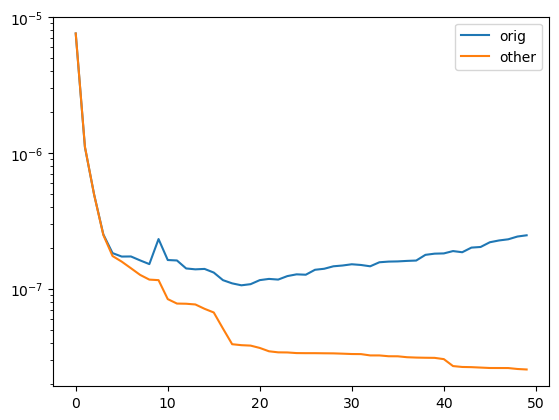

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(range(50), energy_vals, label='orig')
ax.semilogy(range(50), energy_vals_other, label='other')
ax.legend()
plt.show()

/tmp/ipykernel_108410/261330175.py:14: RuntimeWarning: Mean of empty slice.
  evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
/home/ksmiller/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


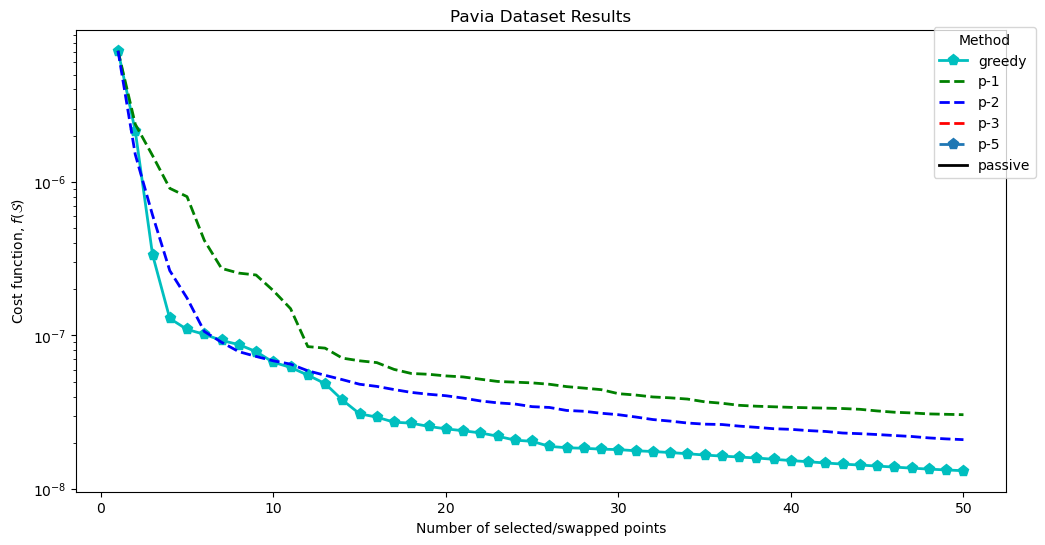

In [156]:
save = False
with open("results/paviasub_cvx_k50_ns10_nla-1_useprev.pkl", "rb") as f:
    data = pickle.load(f)
datasetname = "Pavia"


to_plot = list(data.keys())

fig, ax = plt.subplots(figsize=(12,6))
k = 10
for method, dict in sorted(data.items()):
    if method not in to_plot:
        continue
    evals = np.array([x for x in dict['energy_values']]).mean(axis=0)
    if len(method.split("_")) > 1:
        # if swap move method, overwrite the negative entries with the base adaptive sampling method results
        neg_mask = evals < 0.0
        base_evals = np.array([x for x in data[method.split('_')[0]]['energy_values']]).mean(axis=0)
        evals[neg_mask] = base_evals[neg_mask]
        evals[1:-1] = evals[2:]

    plot = ax.semilogy(np.arange(1, evals.size+1), evals, linestyles[method], label=method, linewidth=2.0, markersize=8)
    

ax.legend(title=r'Method', bbox_to_anchor=(1.04, 1.02))
# ax.set_xscale('log')
ax.set_xlabel(r"Number of selected/swapped points")
ax.set_ylabel(r"Cost function, $f(\mathcal{S})$")
if not save:
    ax.set_title(f"{datasetname} Dataset Results")
else:
    plt.savefig(f"./figures/{datasetname.lower()}_k50_ns10_all.png", format="png", dpi=2500, )
plt.show()


In [18]:
with open("results/paviasub_cvx_k50_ns10_nla-1_useprev.pkl", "rb") as f:
    data = pickle.load(f)
print(list(data['p-2'].keys()))
print(np.array(data['p-2']['times']))

['energy', 'seeds', 'indices', 'energy_values', 'times']
[[3.43944505e-03 1.21137984e-02 4.39121220e-02 4.46774047e-02
  1.05286663e-01 1.41215259e-01 2.77123280e-01 1.76864255e-01
  1.61093520e-01 3.84647541e-01 5.03766505e-01 1.27548527e-01
  2.62509383e-01 5.29446289e-01 4.06935170e-01 4.55203900e-01
  7.60605767e-01 8.64966996e-02 7.12218782e-01 1.59524907e+00
  1.93034625e+00 4.67112117e-01 3.39720733e+00 3.14392237e+00
  7.07131175e-01 7.29958823e-01 8.24007150e-02 2.79923752e-02
  1.39652087e+00 1.47928075e+00 5.48554664e-01 2.23254350e+00
  8.68857551e-01 1.13134927e+00 4.97967936e-02 2.68790156e-01
  7.84636032e-01 1.39752928e+00 1.97464047e+00 1.78675370e+00
  1.93791968e+00 2.67195914e+00 2.41692736e+00 1.11654541e+00
  3.84072040e+00 2.44490358e+00 1.55175532e+00 1.53240953e+00
  1.56670821e+00]
 [3.75799835e-03 1.63139459e-02 1.20070614e-02 4.10399064e-02
  1.56337531e-01 2.35829223e-02 1.14117498e-01 1.87153487e-01
  9.70265716e-02 1.92429299e-01 1.91617869e-01 3.22604248

In [23]:
with open("results/paviasub_cvx_k50_ns10_nla-1_useprev.pkl", "rb") as f:
    data_os = pickle.load(f)
for method, res in data_os.items():
    print(method, np.array(res['times']).shape)

print()
with open("results/paviasub_cvx_k10_ns10_nla-1.pkl", "rb") as f:
    data = pickle.load(f)
for method, res in data.items():
    print(method, np.array(res['times']).shape)

greedy (10, 49)
p-1 (10, 49)
p-2 (10, 49)
p-3 (10, 49)
p-5 (10, 49)
passive (10,)

greedy (10, 9)
greedy_greedy (10, 8)
greedyla (10, 9)
greedyla_greedyla (10, 8)
p-1 (10, 9)
p-2 (10, 9)
p-2_greedyla (10, 8)
p-2_p-2 (10, 8)
p-3 (10, 9)
p-5 (10, 9)
passive (10,)


In [ ]:
time_to_plot_os = ['greedy', 'p-2', 'passive']
time_to_plot = ['greedyla']
fig, ax = plt.subplots(figsize=(12,6))
for name in time_to_plot_os:
    times = data_os[name]['times']
    ax.semilogy()